Diagramme de la structure de bande:


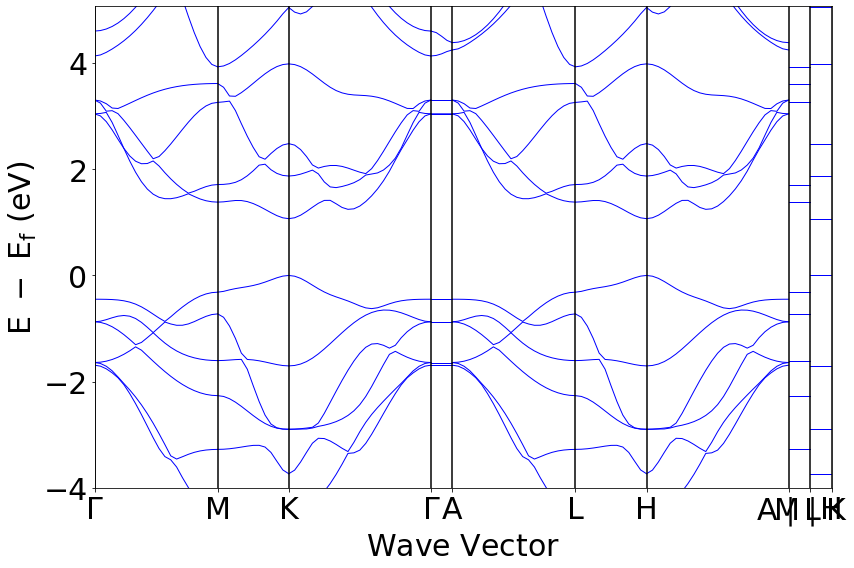

Informations sur la bande interdite :

{'direct': True, 'energy': 1.0703, 'transition': 'K-K'}
Ce matériau est donc un isolant car la largeur de la bande interdite est de 1.0703 cette valeur est supérieure à 1.


In [4]:
from pymatgen.ext.matproj import MPRester
import numpy as np 
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt


with MPRester("73pliZvNbI25Rdqk") as m:
    bands = m.get_bandstructure_by_material_id("mp-1023935", True)


bs_plotter = BSPlotter(bands)
print("Diagramme de la structure de bande:")
bs_plotter.show()

print("Informations sur la bande interdite :")
print("")
print(bands.get_band_gap())
print("Ce matériau est donc un isolant car la largeur de la bande interdite est de",bands.get_band_gap().get('energy'),"cette valeur est supérieure à 1.")



on cherche l'index de la bande de conduction dans le tableau de valeurs d'énergie :

{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}), 'kpoint_index': [34, 35, 130], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7fcb021e1dd8>, 'energy': 0.8483, 'projections': {}}

On trouve donc l'indice 12 pour la bande de conduction

On fait la même chose pour la bande de valence
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [11]}), 'kpoint_index': [34, 35, 130], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7fcb021e1dd8>, 'energy': -0.222, 'projections': {}}

On trouve l'indice 11 pour la bande de valence

Il faut ensuite déterminer les maxima et minima de dispersion pour la bande de conduction et de valence. Pour ça, on réalise une approximation linéaire des bandes afin de déterminer les pentes les plus grandes et les plus faibles. Voici les résultats.

Bande de valence : 

La bande de valence possède un maximum de 

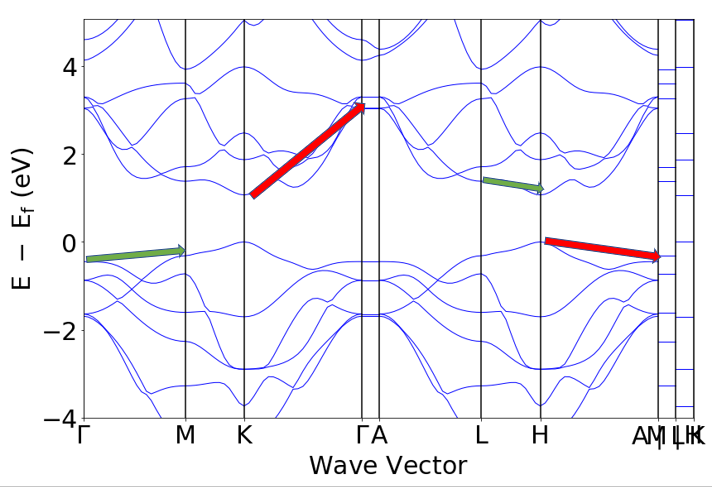

In [2]:
data =  bs_plotter.bs_plot_data()
Distdata = data.get('ticks').get('distance')
print("on cherche l'index de la bande de conduction dans le tableau de valeurs d'énergie :")
print("")
print(bands.get_cbm())
print("")
print("On trouve donc l'indice 12 pour la bande de conduction")
print("")
print("On fait la même chose pour la bande de valence")
print(bands.get_vbm())
print("")
print("On trouve l'indice 11 pour la bande de valence")


#Je détermine le vecteur deltaX qui va permettre de determiner les pentes maximales et minimales
index = np.array([0,1,3,5,7,9,11,13,15])
deltaX = np.zeros(len(index)-1)
VecOnde = np.zeros(len(index))
for i in range(len(index)-1) :
    deltaX[i] = Distdata[index[i+1]] - Distdata[index[i]]
    VecOnde[i+1] = Distdata[index[i]]

    
#Je détermine le vecteur deltaY qui correspond aux deltas d'energie, pour la bande de conduction et pour la bande de valence
Energydata = data.get('energy')[0].get('1')
deltaYcond = np.zeros(len(index)-1)
deltaYval = np.zeros(len(index)-1)
for i in range (len(index)-1) :
        deltaYcond[i] = Energydata[12][i+1] - Energydata[12][i]
        deltaYval[i] = Energydata[11][i+1] - Energydata[11][i]

penteCond = np.array(deltaYcond/deltaX) 
penteVal = np.array(deltaYval/deltaX)

condMax = max(abs(penteCond))
condMin = min(abs(penteCond))
valMax = max(abs(penteVal))
valMin = min(abs(penteVal))
print("")
print("Il faut ensuite déterminer les maxima et minima de dispersion pour la bande de conduction et de valence. Pour ça, on réalise une approximation linéaire des bandes afin de déterminer les pentes les plus grandes et les plus faibles. Voici les résultats.")
print("")
print("Bande de valence : ")
print("")
print("La bande de valence possède un maximum de dispersion dans la direction H - AM d'une valeur de ", valMax)
print("")
print("La bande de valence possède un minimum de dispersion dans la direction \u0393 - M d'une valeur de ", valMin)
print("")
print("Bande de conduction : ")
print("")
print("La bande de conduction possède un maximum de dispersion dans la direction K - \u0393 d'une valeur de ", condMax)
print("")
print("La bande de conduction possède un minimum de dispersion dans la direction L - H d'une valeur de ", condMin)
print("")
print("")

from IPython.display import Image
print("Diagramme de la structure de bande avec maxima et minima de dispersion")
Image("dispersion.PNG")

In [3]:
# Calcul de la masse effective


h = 1.05457e-34/1.6022e-19
Econd = bands.get_cbm()['energy']
Kcond = bands.get_cbm()['kpoint'].cart_coords
MEcond = (h**2)*(Kcond[0]**2+Kcond[1]**2+Kcond[2]**2)/(2*Econd)
print("la masse effective du sommet de la bande de conduction est de :", MEcond)
print("")
Eval = bands.get_vbm()['energy']
Kval = bands.get_vbm()['kpoint'].cart_coords
MEval = (h**2)*(Kval[0]**2 + Kval[1]**2 + Kval[2]**2)/(2*Eval)
print("la masse effective de la base de la bande de valence est de :", MEval)
print("")

print("Pour illustrer le calcul de masse effective, on sait que le sommet de la bande de conduction et la base de la bande de valence peuvent être approximés par des paraboles.")
print("On va donc calculer les fonctions analytiques des paraboles pour pouvoir plot les graphe de dispersion ainsi que les paraboles.")
print("")
#On trouve le maximum de la parabole ainsi qu'un point voisin afin de determiner l'expression de celle-ci.
E = data.get("energy")
x = data.get("distances")
ycond = E[0].get("1")[12]

imax = np.where(Energydata[12] == max(Energydata[12]))[0]
y1 = Energydata[12][0]
x1 = Distdata[0]
y2 = Energydata[12][1]
x2 = Distdata[1]
a = y2/(x2-x1)**2
print("Pour déterminer la fonction de la parabole, on determine le point maximum ainsi qu'un point voisin.")
print("Ici le point maximum est : ",x1,y1)
print("Le point voisin qu'on va utiliser est ", x2,y2)
print('On trouve donc une expression analytique : f(x) = ',a,'*(x-',x1,')^2')
xp = np.linspace(0,4.0) #vecteur autour de x_p1 et x_p2
yp = a*(xp - x1)**2

la masse effective du sommet de la bande de conduction est de : 3.537772649726203e-31

la masse effective de la base de la bande de valence est de : -1.3518434859291613e-30

Pour illustrer le calcul de masse effective, on sait que le sommet de la bande de conduction et la base de la bande de valence peuvent être approximés par des paraboles.
On va donc calculer les fonctions analytiques des paraboles pour pouvoir plot les graphe de dispersion ainsi que les paraboles.

Pour déterminer la fonction de la parabole, on determine le point maximum ainsi qu'un point voisin.
Ici le point maximum est :  0.0 3.0458
Le point voisin qu'on va utiliser est  1.0193577201000499 3.0071
On trouve donc une expression analytique : f(x) =  2.8939740855396487 *(x- 0.0 )^2
